<a href="https://colab.research.google.com/github/yoooniverse/NLP/blob/main/TwentyNewsgroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다층 퍼셉트론(MultiLayer Perceptron, MLP)에 대한 이해

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [3]:
newsdata = fetch_20newsgroups(subset='train')
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [4]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [5]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


goal : 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것

In [7]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

첫번째 샘플의 레이블 : 7
7번 레이블이 의미하는 주제 : rec.autos


In [8]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [9]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [11]:
data.isnull().values.any()

False

In [13]:
print("중복을 제외한 샘플의 수 : {}".format(data['email'].nunique()))
print("중복을 제외한 주제의 수 : {}".format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


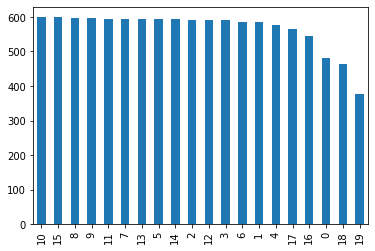

In [14]:
data['target'].value_counts().plot(kind='bar');

In [15]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [16]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']

test_email = newsdata_test.data
test_label = newsdata_test.target

In [17]:
vocab_size = 10000 #이번 실습에서 사용할 최대 단어 개수를 정의하는 변수
num_classes = 20

In [18]:
def prepare_data(train_data, test_data, mode):
  tokenizer = Tokenizer(num_words=vocab_size)
  tokenizer.fit_on_texts(train_data)
  X_train = tokenizer.texts_to_matrix(train_data, mode=mode)
  X_test = tokenizer.texts_to_matrix(test_data, mode=mode)

  return X_train, X_test, tokenizer.index_word

메일 본문에 대해서는 'binary' 모드로 변환하고, 훈련 데이터와 테스트 데이터의 레이블은 원-핫 인코딩을 수행

In [19]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes)

In [20]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [21]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


다층 퍼셉트론(MLP) : 단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망

다층 퍼셉트론은 피드 포워드 신경망(Feed Forward Neural Network, FFNN)의 가장 기본적인 형태

FFNN : 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망



In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
  model = Sequential()
  model.add(Dense(256, input_shape=(vocab_size, ), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
  score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
  return score[1]

이번에 설계한 다층 퍼셉트론은 은닉층이 2개이므로 깊은 신경망(Deep Neural Network, DNN)

과적합을 막기 위해서 두 번의 드롭아웃(Dropout)을 적용

다중 클래스 분류 문제

출력층의 활성화 함수로는 소프트맥스 함수를 사용하고, 손실 함수로는 크로스 엔트로피(categorical_crossentropy) 함수를 사용

In [25]:
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
  X_train, X_test, _ = prepare_data(train_email, test_email, mode)
  score = fit_and_evaluate(X_train, y_train, X_test, y_test)
  print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 4s 40ms/step - loss: 2.2390 - accuracy: 0.3461 - val_loss: 0.9473 - val_accuracy: 0.7933
Epoch 2/5
80/80 [==============================] - 4s 48ms/step - loss: 0.8451 - accuracy: 0.7700 - val_loss: 0.4556 - val_accuracy: 0.8896
Epoch 3/5
80/80 [==============================] - 3s 37ms/step - loss: 0.4305 - accuracy: 0.8867 - val_loss: 0.3518 - val_accuracy: 0.9011
Epoch 4/5
80/80 [==============================] - 3s 37ms/step - loss: 0.2641 - accuracy: 0.9333 - val_loss: 0.3132 - val_accuracy: 0.9046
Epoch 5/5
80/80 [==============================] - 3s 37ms/step - loss: 0.1666 - accuracy: 0.9598 - val_loss: 0.2911 - val_accuracy: 0.9125
binary 모드의 테스트 정확도: 0.8274030685424805
Epoch 1/5
80/80 [==============================] - 4s 38ms/step - loss: 2.7818 - accuracy: 0.2434 - val_loss: 1.7222 - val_accuracy: 0.7067
Epoch 2/5
80/80 [==============================] - 3s 37ms/step - loss: 1.4782 - accuracy: 0.6152 - val_loss: 0.7201 - va